In [1]:
# Our sound network
from CoolSoundNetwork import Network

# Scipy for sound
import scipy.io.wavfile as wav

# VAD
from tools import *

# Status bar
from tqdm import tqdm_notebook

# Numpy
import numpy as np

# Create network

In [2]:
network = Network(vectorizer_weights_file_name='../../data/vectorizer_weights.npy', 
                  similar_weights_file_name="../../data/simvoice_weights.npy")

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


# Load sound

In [3]:
sampling_rate, sample = wav.read("1.wav")

In [4]:
sample = sample[40000:]

# View results

In [5]:
predicted = predict_by_energy([i[0] for i in sample], sampling_rate, threshold=0.01)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

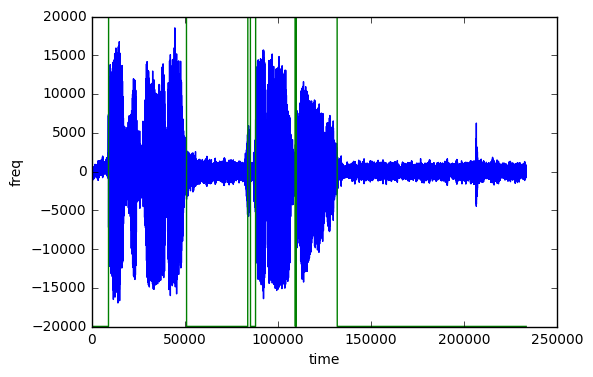

In [7]:
plt.plot([(i[0], 19990 if i[1] else -19990) for i in predicted])
plt.xlabel("time")
plt.ylabel("freq")

In [8]:
old = False
tmp = []
answer = []

for i in tqdm_notebook(predicted):
    if not old and i[1]:
        tmp.append(i[0])
        old = True
    elif old and i[1]:
        tmp.append(i[0])
        old = True
    elif old and not i[1]:
        answer.append(tmp)
        tmp = []
        indel = 0

In [9]:
answer = list(filter(lambda x: len(x) > 0, answer))

In [10]:
len(answer)

5

In [11]:
from librosa import load, logamplitude
from librosa.feature import melspectrogram

def get_spectrogram(y, sr):
    S = melspectrogram(y, sr=sr, n_mels=513)
    log_S = logamplitude(S, ref_power=np.max)
    return log_S

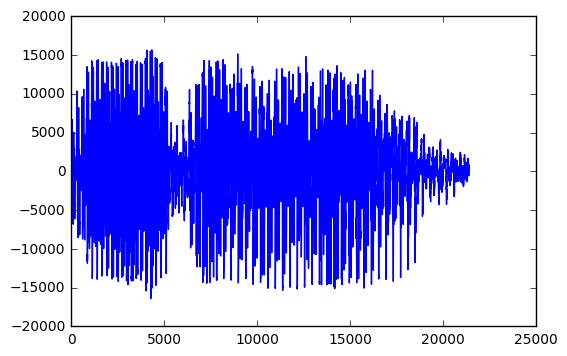

In [12]:
plt.plot(answer[2])

In [13]:
_all = []
for i in tqdm_notebook(answer):
    _all.append(network.vectorizer(voice_array=get_spectrogram(np.array(i), sampling_rate).T/200.))

In [17]:
np.stack((_all[0][:1], _all[-1][:1]), axis=1).shape

(1, 2, 300)

In [14]:
network.simvoice(vectors=np.stack((_all[0][:1], _all[1]), axis=1)[0])

array([[ 0.49924779]], dtype=float32)

In [18]:
import theano.tensor as T
def distance_sq(x1, x2):
    return T.sum(T.sqr(x1 - x2))

In [19]:
mat = T.matrix()
dis_sq = distance_sq(mat[0], mat[1])
dq = theano.function([mat], dis_sq)

In [20]:
_all_ = []
for i in range(len(_all)):
    _all_.extend(_all[i])

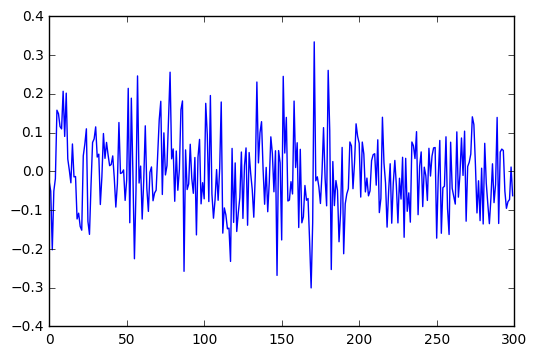

In [21]:
plt.plot(_all_[0])

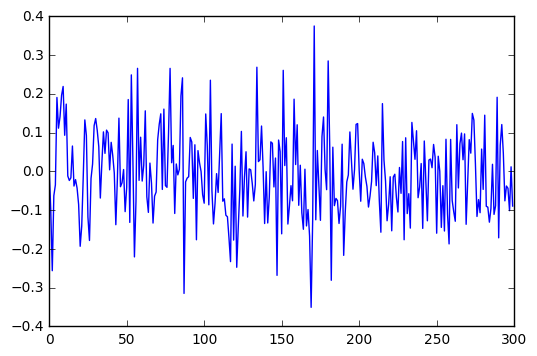

In [22]:
plt.plot(_all_[11])

In [23]:
network.simvoice(vectors=vect)

NameError: name 'vect' is not defined

In [24]:
similar_ = []
dist_sq_ = []
for i in range(len(_all_)-1):
    vect = np.vstack((_all_[i], _all_[i+1]))
#     print(vect.shape)
    dist_sq_.append(dq(vect))
    similar_.append(network.simvoice(vectors=vect)[0][0])

In [27]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

In [28]:
cosine_similarity(_all_[9], _all_)

/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.74012029,  0.71210456,  0.72499025,  0.73154616,  0.69319248,
         0.7119239 ,  0.72120428,  0.72744024,  0.83609807,  0.99999982,
         0.7230345 ,  0.71153772,  0.69965398,  0.68009734,  0.8545109 ,
         0.80757362,  0.70798254,  0.69864851,  0.71103692,  0.72136068,
         0.9214139 ]], dtype=float32)

In [ ]:
network.simvoice(vectors=vect)

In [ ]:
np.sqrt(np.array(dist_sq_))

In [29]:
similar_

[0.49924779,
 0.49924779,
 0.49924779,
 0.49924779,
 0.49924779,
 0.49924779,
 0.49924779,
 0.49924779,
 0.49924779,
 0.49924779,
 0.49924779,
 0.49924779,
 0.49924779,
 0.49924779,
 0.49924779,
 0.49924779,
 0.49924779,
 0.49924779,
 0.49924779,
 0.49924779]